<h1>SpaceX  Falcon 9 first stage Landing Prediction</h1>

---

# 5. Machine Learning Prediction


Now, we will create a machine learning pipeline to predict if the first stage will land given the data from the preceding stages.


### Objectives



*   Standardize the data.
*   Split into training data and test data.
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression.
*   Find the best performing method using test data.


---

In [69]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
style1 = 'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'
#plt.style.use(style1)

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import jaccard_score, f1_score, log_loss
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

This function is to plot the confusion matrix.


In [70]:
def plot_confusion_matrix(y, predicted):
  cm = confusion_matrix(y, predicted)
  ax = plt.subplot(1,1,1)

  sns.heatmap(cm, annot = True, ax = ax, cmap = 'BuPu') # annot -> annotate cells; showing values inside
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
  ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

  plt.show()

### Data


In [125]:
# Previosly refined TARGET VARIABLE ('class') data Set
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url1)

df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,...,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,...,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,...,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,...,0,B0007,-80.577366,28.561857,0


In [72]:
# Previosly created FEATURES data Set
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url2)

X.head(3) #Independent variables

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### 1. Target Variable
Once the independent variables are defined, we set the dependent variable array.


In [73]:
y = df['Class'].to_numpy() # np.array( df[] )
y # Dependent variable

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### 2. Normalization
Due differences in scale between features, we normalize the data.


In [74]:
T = preprocessing.StandardScaler()
X = T.fit(X).transform(X)

 using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


### 3. Train - Test Split
We split the data into training and testing data for validation and check if any overfitting was made.


In [75]:
xtrain, xtest, ytrain, ytest = train_test_split( X, y, test_size = 0.2, random_state = 2 )
print( f'Train: {xtrain.shape}, {ytrain.shape} \nTest: {xtest.shape}, {ytest.shape}' )

Train: (72, 83), (72,) 
Test: (18, 83), (18,)


---

### 4. Logistic Regression


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [76]:
'''
LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)
Técnica de optimización numérica que utiliza aproximaciones
de la matriz Hessiana para mejorar la eficiencia del cálculo.
Es especialmente eficiente para problemas de optimización de GRAN escala.

SAG - Average Gradient, for non necessarily convex functions.
'''

# l1-lasso, l2-ridge regularization
parameters ={'C':[0.001, 0.01, 1],'penalty':['l2'],
             'solver':['lbfgs', 'liblinear']} # 'sag' no converge en este caso
             #ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

lr = LogisticRegression()
                                 # Cross Validation
best_lr = GridSearchCV( estimator = lr, cv = 10, param_grid = parameters )
best_lr.fit(xtrain, ytrain)

print("Tuned hpyerparameters: ", best_lr.best_params_)
print("Train Accuracy: ", round(best_lr.best_score_, 3))

Tuned hpyerparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy:  0.846


#### 5. LogR - Accuracy


In [77]:
acc = best_lr.score(xtest, ytest)
print( "Test Accuracy:", round(acc, 3) )

Test Accuracy: 0.833


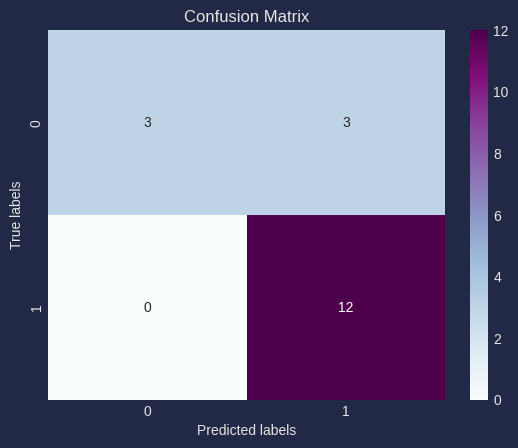

In [78]:
proba_lr = best_lr.predict_proba(xtest) # proba of belonging to each class -> find log_loss
prediction_lr = best_lr.predict(xtest)

plot_confusion_matrix(ytest, prediction_lr)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is False Positives.


### 6. SVM


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [79]:
options = np.logspace(-3, 3, 5)
options

array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])

In [80]:
parameters = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
              'C': options, 'gamma': options}
svm = SVC()

best_svm = GridSearchCV( estimator = svm, cv = 10, param_grid = parameters )
best_svm.fit(xtrain, ytrain)

print("Tuned hpyerparameters: ", best_svm.best_params_)
print("Train Accuracy: ", round(best_svm.best_score_, 3))

Tuned hpyerparameters:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Train Accuracy:  0.848


#### SVM - Accuracy


In [81]:
acc = best_svm.score(xtest, ytest)
print( "Test Accuracy:", round(acc,3) )

Test Accuracy: 0.833


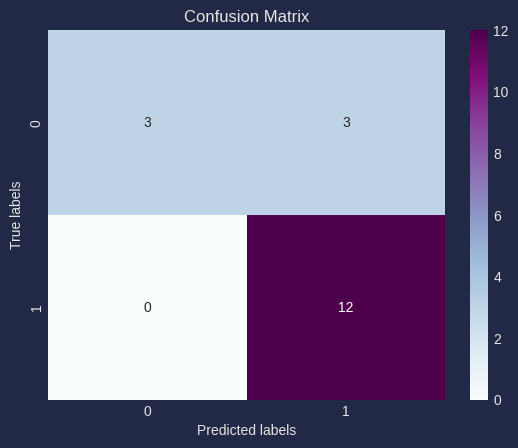

In [82]:
prediction_svm = best_svm.predict(xtest)
plot_confusion_matrix(ytest, prediction_svm)

We appreciate rather similar result to what was previously seen in Logistic Regression modelling.

### 8. Decision Tree


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'], # estrategia de división en cada nodo. best -> segun el criterio
     'max_depth': [2*n for n in range(1,10+1)], # numero de nodos
     'max_features': ['sqrt', 'auto'], # auto: Para la division de nodo, se consideran todas las x
     'min_samples_leaf': [1, 2, 4], # minimo muestras necesarias para tener una hoja
     'min_samples_split': [2, 5, 10]} # minimo para tener una division valida
tree = DecisionTreeClassifier()

best_tree = GridSearchCV( estimator = tree, cv = 10, param_grid = parameters )
best_tree.fit(xtrain, ytrain)

In [160]:
print("Tuned hpyerparameters: ", best_tree.best_params_)
print("Train Accuracy: ", round(best_tree.best_score_, 3))

Tuned hpyerparameters:  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Train Accuracy:  0.889


#### 9. Tree - Accuracy


In [157]:
acc = best_tree.score(xtest, ytest)
print( "Test Accuracy:", round(acc,3) )

Test Accuracy: 0.944


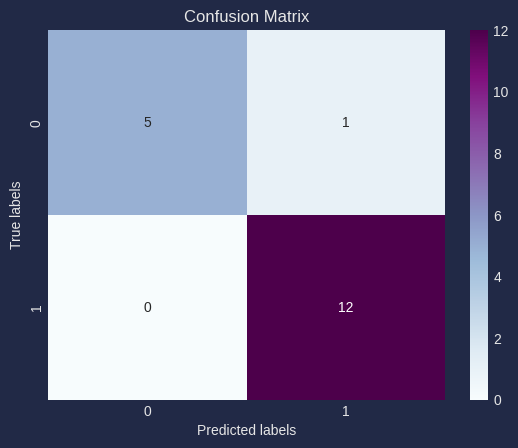

In [158]:
prediction_tree = best_tree.predict(xtest)
plot_confusion_matrix(ytest, prediction_tree)

We obtain an almost perfect precision, however we note that on this occasion the False Positives error persist.


### 10. K - Nearest Neighbors


Minkowski.

$ dist(A, B) = (|A_0 - B_0|^p + |A_1 - B_1|^p + ... + |A_{n-1} - B_{n-1}|^p)^{1/p} $

'$p$' in KNN allows to control the power of the Minkowski distance. The Manhattan distance (L1 - absolute sum distance) is used by $p = 1$. The Euclidean distance (L2 distance) when $p=2$.


In [87]:
k = list( range(1, 10+1) )
parameters = {'n_neighbors': k,
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()

best_knn = GridSearchCV( estimator = KNN, cv = 10, param_grid = parameters )
best_knn.fit(xtrain, ytrain)

print("Tuned hpyerparameters: ", best_knn.best_params_)
print("Train Accuracy: ", round(best_knn.best_score_, 3))

Tuned hpyerparameters:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Train Accuracy:  0.848


#### 11. KNN - Accuracy


In [88]:
acc = best_knn.score(xtest, ytest)
print( "Test Accuracy:", round(acc,3) )

Test Accuracy: 0.833


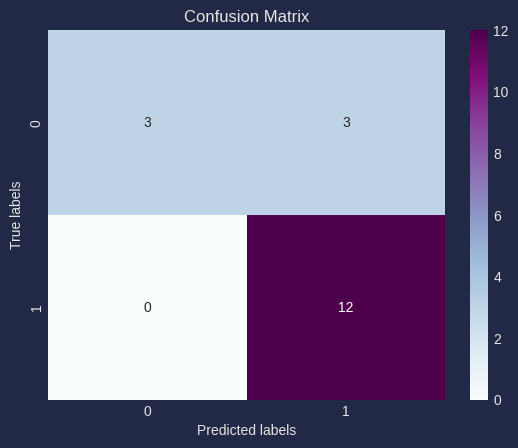

In [89]:
prediction_knn = best_knn.predict(xtest)
plot_confusion_matrix(ytest, prediction_knn)

---

### 12. Best Performance


In [176]:
# Create the Performance Report
def metrics( y = ytest, prediction = None, log_r = None, pos_class = 1 ):
  metrics = [ accuracy_score(y, prediction),
              jaccard_score(y, prediction, pos_label = pos_class),
              f1_score(y, prediction, average = 'weighted') ]

  if log_r is not None: metrics.append(  log_loss(ytest, log_r) )
  else: metrics.append(np.nan)

  return metrics


models = ['SVM', 'D.Tree', 'KNN', 'L.Regression']
labels = ['Accuracy', 'Jaccard', 'F1 Score', 'LogLoss']

m_svm = metrics(prediction = prediction_svm); m_tree = metrics(prediction = prediction_tree)
m_knn = metrics(prediction = prediction_knn); m_log = metrics(prediction = prediction_lr, log_r = proba_lr)
metrics = [m_svm, m_tree, m_knn, m_log]

dic = dict( zip(models, metrics) )
report = pd.DataFrame( dic, index = labels )

In [180]:
# Find the best performing method
sum = report.iloc[ :-1, : ].sum()
best_model = sum.idxmax() # col. with the greatest accumulated score

print( f'Best performing model: {best_model}.' )
print( 'F1 Score:', '{:.3f}'.format(report.loc['F1 Score', best_model]) )

Best performing model: D.Tree.
F1 Score: 0.943


In [165]:
# Show whole Report
report = report.applymap( lambda x: round(x,3) ) # apply() -> solo aplica para un eje especifico
report.fillna('-', inplace = True)
report

,SVM,D.Tree,KNN,L.Regression
Accuracy,0.833,0.944,0.833,0.833
Jaccard,0.8,0.923,0.8,0.800
F1 Score,0.815,0.943,0.815,0.815
LogLoss,-,-,-,0.479


Finally the model with the best performance was the **Decision Tree**, with an *F1 Score* of $0.943$.

Where the *F1 score* is a commonly used metric to assess the performance of a classifier, especially
when classes are unbalanced, as is the case in our data set.
Combines precision and recall in a single value that
represents the ability of a model to correctly classify both positive and negative samples.